In [103]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re


SyntaxError: invalid syntax (<ipython-input-102-393a2b210cf4>, line 1)

In [ ]:
import os
os.getcwd()

In [104]:
data = pd.read_csv('C:\\Users\\Aditya\\Sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]

In [105]:
data = data[data.sentiment != "Neutral"]
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

print(data[ data['sentiment'] == 'Positive'].size)
print(data[ data['sentiment'] == 'Negative'].size)

for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')
    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

10756
16986


In [106]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 28, 128)           256000    
_________________________________________________________________
spatial_dropout1d_6 (Spatial (None, 28, 128)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [107]:
Y = pd.get_dummies(data['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(9293, 28) (9293, 2)
(4578, 28) (4578, 2)


In [108]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size, verbose = 2)

Epoch 1/7
 - 134s - loss: 0.5883 - acc: 0.6804
Epoch 2/7
 - 132s - loss: 0.5038 - acc: 0.7495
Epoch 3/7
 - 131s - loss: 0.4649 - acc: 0.7799
Epoch 4/7
 - 131s - loss: 0.4339 - acc: 0.7949
Epoch 5/7
 - 131s - loss: 0.4084 - acc: 0.8120
Epoch 6/7
 - 131s - loss: 0.3835 - acc: 0.8268
Epoch 7/7
 - 131s - loss: 0.3580 - acc: 0.8364


In [109]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

score: 0.59
acc: 0.73


In [110]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")

pos_acc 57.50421585160203 %
neg_acc 78.83131201764057 %


In [114]:
twt = ['NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly']
#vectorizing the tweet by the pre-fitted tokenizer instance
text=twt
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=28, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0   52   78  341  456   22    2  420  365   95   29   51 1039]]
negative


In [116]:
text=''.join(text)
print(text)
text1= text.split()
print(text1)

NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly
['NancyLeeGrahn:', 'How', 'did', 'everyone', 'feel', 'about', 'the', 'Climate', 'Change', 'question', 'last', 'night?', 'Exactly']


In [118]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


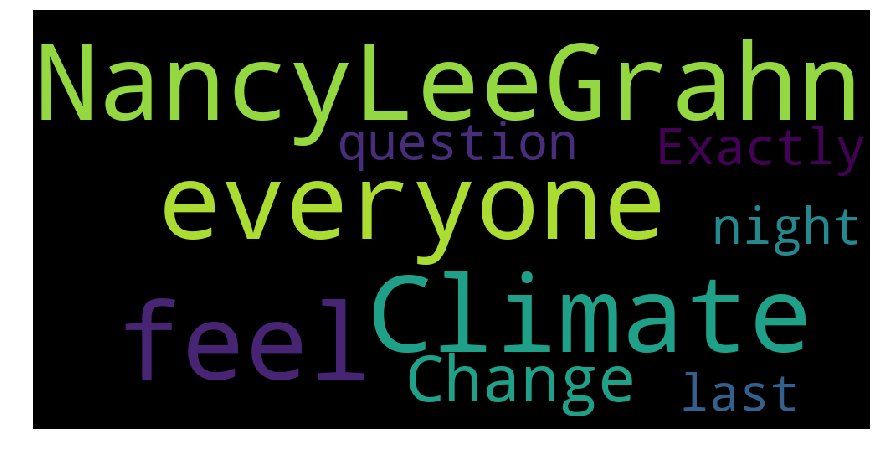

In [119]:

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(text1))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()